In [2]:
import pandas as pd
import xml.etree.ElementTree as ET

etree = ET.parse('benchmark_results.xml').getroot()

df = []

def map_node(name, node):
    testcase, casenumber = node.get("name").split('#')
    return {
        "name": name,
        "testcase": testcase,
        "casenumber": casenumber,
        "time": node.get("time")
    }
    
for node in etree:
    name = node.get('name')
    testcases = node.findall('testcase')
    df.extend((map_node(name, i) for i in testcases))
    
df = pd.DataFrame(df)
df['time'] = pd.to_numeric(df['time'], errors='ignore')
df['casenumber'] = pd.to_numeric(df['casenumber'], errors='ignore')


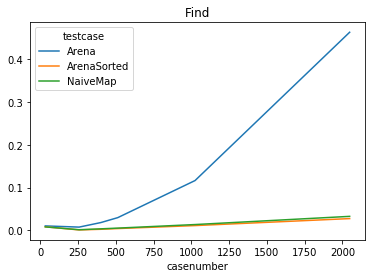

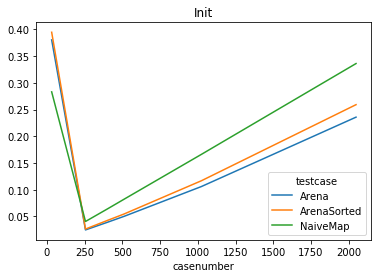

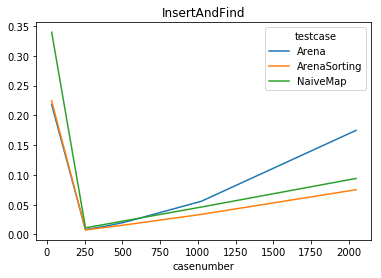

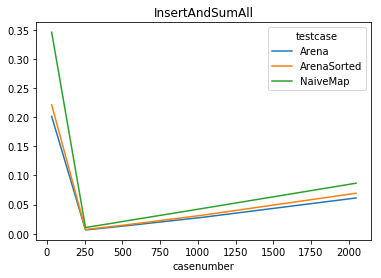

In [4]:
import matplotlib.pyplot as plt

for name, d in df.groupby('name'):
    d = d.pivot(index='casenumber', columns='testcase', values='time')
    d = d.sort_index(1)
    plot = d.plot(title=name)
    plt.savefig(name)